## Analýza zamestnancov VŠ

In [1]:
import pandas as pd

# from pandasql import sqldf
# from sklearn import datasets

import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns

import scipy

import itertools
import numpy as np

In [2]:
df = pd.read_csv('../data/preprocessed/regzam.csv', index_col=0)
display(df)

,Employee_ID,FamilyName,GivenName,DegreePedagogicalAcademic,DegreeMaster,DegreeDoctor,Employment_Workplace_University,Employment_Workplace_Faculty,Employment_Type,Employment_Subtype,Employment_BeginDate,Employment_EndDate,Employment_Ratio,Guarantee,Guarantee_StudyProgram,Guarantee_University,Guarantee_Faculty,Guarantee_FormOfStudy,Guarantee_LevelOfStudy
0,18799121690,Kočan,Štefan,Doc.,JUDr.,PhD.,Vysoká škola bezpečnostného manažérstva v Koši...,NaN,Docent,s titulom docent a vysokoškolským vzdelaním tr...,2020-10-01,NaN,100,False,NaN,NaN,NaN,NaN,NaN
1,14002860472,Korgo,Dušan,DOC,JUDR,PHD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN
2,17922733804,Buzalka,Ján,prof.,PhDr.,CSc.,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN
3,16290288493,Stieranka,Jozef,prof.,Ing.,PhD.,Akadémia Policajného zboru,NaN,Profesor,s titulom profesor a vysokoškolským vzdelaním ...,2013-11-01,NaN,100,True,"['bezpečnostnoprávna ochrana osôb a majetku', ...","['Akadémia Policajného zboru', 'Akadémia Polic...","[None, None, None, None, None, None, None]","['1', '2', '1', '2', '2', '1', '2']","['1', '1', '2', '2', '2', '3', '3']"
4,21401303068,Wäldl,Ľuboš,doc.,JUDr.,PhD.,Akadémia Policajného zboru,NaN,Profesor,s titulom docent a vysokoškolským vzdelaním tr...,2008-09-01,NaN,100,False,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32725,12110964830,Spurný,Joža,doc.,JUDr.PhDr.,Ph.D.,Vysoká škola zdravotníctva a sociálnej práce s...,NaN,Docent,s titulom docent a vysokoškolským vzdelaním tr...,2022-09-30,NaN,100,False,NaN,NaN,NaN,NaN,NaN
32726,13500390262,Harčárová,Marcela,NaN,Mgr.,NaN,Vysoká škola zdravotníctva a sociálnej práce s...,NaN,Asistent,s vysokoškolským vzdelaním druhého stupňa,2022-09-01,NaN,50,False,NaN,NaN,NaN,NaN,NaN
32727,17108478442,Juhásová,Jana,NaN,Mgr.,NaN,Vysoká škola zdravotníctva a sociálnej práce s...,NaN,Asistent,s vysokoškolským vzdelaním druhého stupňa,2022-09-01,NaN,50,False,NaN,NaN,NaN,NaN,NaN
32728,15917135755,Kubušová,Miriama,NaN,Mgr.,NaN,Vysoká škola zdravotníctva a sociálnej práce s...,NaN,Asistent,s vysokoškolským vzdelaním druhého stupňa,2022-09-01,NaN,50,False,NaN,NaN,NaN,NaN,NaN


In [3]:
id_set = set(df["Employee_ID"])
print(len(id_set))

32730


-> máme Dataset s 32730 riadkami, pričom žiadne 2 Employee_ID nie sú rovnaké

In [4]:
name_set = set(df["FamilyName"] + " " + df["GivenName"])
len(name_set)

31639

-> 31639 rôznych mien; zostáva zistiť, či pri duplikátnych menách sa jedná o tú istú osobu, alebo nie.
Tiež by nás mohlo zaujímať, ako ukladali osoby, ktorým sa zmenilo meno...

In [5]:
def find_name_duplicates(df):
    name_set = set()
    name_duplicates = set()
    duplicates_ids = set()
    for index, row in df.iterrows():
        name = row["FamilyName"] + " " + row["GivenName"]
        if name in name_set:
            name_duplicates.add(name)
        else:
            name_set.add(name)
    for index, row in df.iterrows():
        name = row["FamilyName"] + " " + row["GivenName"]
        if name in name_duplicates:
            duplicates_ids.add(row["Employee_ID"])
    return tuple(name_duplicates), tuple(duplicates_ids)

In [6]:
name_duplicates, ids = find_name_duplicates(df)

In [7]:
# q = f"SELECT * FROM df WHERE Employee_ID IN {ids}"
# duplicates_df = sqldf(q, globals()).sort_values(by=['FamilyName', 'GivenName'])
# display(duplicates_df)

In [8]:
df.query("GivenName == 'Viktória' and FamilyName == 'Žilková'")

,Employee_ID,FamilyName,GivenName,DegreePedagogicalAcademic,DegreeMaster,DegreeDoctor,Employment_Workplace_University,Employment_Workplace_Faculty,Employment_Type,Employment_Subtype,Employment_BeginDate,Employment_EndDate,Employment_Ratio,Guarantee,Guarantee_StudyProgram,Guarantee_University,Guarantee_Faculty,Guarantee_FormOfStudy,Guarantee_LevelOfStudy
17361,10056354153,Žilková,Viktória,NaN,Mgr.,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN
32149,14058627798,Žilková,Viktória,NaN,NaN,MSc.,Univerzita Komenského v Bratislave,Lekárska fakulta,Výskumný pracovník - výskumník,s vysokoškolským vzdelaním druhého stupňa,2022-06-15,NaN,50,False,NaN,NaN,NaN,NaN,NaN


... V tomto bode sme zistili, že naše stiahnuté xml zrejme obsahuje len dáta pre aktuálnych zamestnancov...

Pre minulých (zamestnancov) neobsahuje údaje o zamestnaní, predovšetkým nevieme z dát zistiť, v akom období a kde boli zamestnaní, hoci ich meno je v dátach.

In [9]:
df.query("Employment_EndDate.isna()")

,Employee_ID,FamilyName,GivenName,DegreePedagogicalAcademic,DegreeMaster,DegreeDoctor,Employment_Workplace_University,Employment_Workplace_Faculty,Employment_Type,Employment_Subtype,Employment_BeginDate,Employment_EndDate,Employment_Ratio,Guarantee,Guarantee_StudyProgram,Guarantee_University,Guarantee_Faculty,Guarantee_FormOfStudy,Guarantee_LevelOfStudy
0,18799121690,Kočan,Štefan,Doc.,JUDr.,PhD.,Vysoká škola bezpečnostného manažérstva v Koši...,NaN,Docent,s titulom docent a vysokoškolským vzdelaním tr...,2020-10-01,NaN,100,False,NaN,NaN,NaN,NaN,NaN
1,14002860472,Korgo,Dušan,DOC,JUDR,PHD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN
2,17922733804,Buzalka,Ján,prof.,PhDr.,CSc.,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN
3,16290288493,Stieranka,Jozef,prof.,Ing.,PhD.,Akadémia Policajného zboru,NaN,Profesor,s titulom profesor a vysokoškolským vzdelaním ...,2013-11-01,NaN,100,True,"['bezpečnostnoprávna ochrana osôb a majetku', ...","['Akadémia Policajného zboru', 'Akadémia Polic...","[None, None, None, None, None, None, None]","['1', '2', '1', '2', '2', '1', '2']","['1', '1', '2', '2', '2', '3', '3']"
4,21401303068,Wäldl,Ľuboš,doc.,JUDr.,PhD.,Akadémia Policajného zboru,NaN,Profesor,s titulom docent a vysokoškolským vzdelaním tr...,2008-09-01,NaN,100,False,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32725,12110964830,Spurný,Joža,doc.,JUDr.PhDr.,Ph.D.,Vysoká škola zdravotníctva a sociálnej práce s...,NaN,Docent,s titulom docent a vysokoškolským vzdelaním tr...,2022-09-30,NaN,100,False,NaN,NaN,NaN,NaN,NaN
32726,13500390262,Harčárová,Marcela,NaN,Mgr.,NaN,Vysoká škola zdravotníctva a sociálnej práce s...,NaN,Asistent,s vysokoškolským vzdelaním druhého stupňa,2022-09-01,NaN,50,False,NaN,NaN,NaN,NaN,NaN
32727,17108478442,Juhásová,Jana,NaN,Mgr.,NaN,Vysoká škola zdravotníctva a sociálnej práce s...,NaN,Asistent,s vysokoškolským vzdelaním druhého stupňa,2022-09-01,NaN,50,False,NaN,NaN,NaN,NaN,NaN
32728,15917135755,Kubušová,Miriama,NaN,Mgr.,NaN,Vysoká škola zdravotníctva a sociálnej práce s...,NaN,Asistent,s vysokoškolským vzdelaním druhého stupňa,2022-09-01,NaN,50,False,NaN,NaN,NaN,NaN,NaN


## -> Až 32434 riadkov nemá EndDate, čo aj potvrdzuje našu hypotézu, že máme zlé dáta :(  (iba súčasné úväzky)

## **- Pracujú zamestnanci aj na viacerých pracoviskách a vidno v tom nejaké trendy alebo zhluky?**

In [10]:
df_workplaces = pd.read_csv('../data/preprocessed/regzam_workplaces_current.csv', index_col=0)
display(df_workplaces)

,Employee_ID,FamilyName,GivenName,DegreePedagogicalAcademic,DegreeMaster,DegreeDoctor,Employment_Workplace_University,Employment_Type,Employment_Ratio
0,18799121690,Kočan,Štefan,Doc.,JUDr.,PhD.,Vysoká škola bezpečnostného manažérstva v Koši...,Docent,100.00
1,16290288493,Stieranka,Jozef,prof.,Ing.,PhD.,Akadémia Policajného zboru,Profesor,100.00
2,21401303068,Wäldl,Ľuboš,doc.,JUDr.,PhD.,Akadémia Policajného zboru,Profesor,100.00
3,69828748660,Kostrec,Matej,NaN,JUDr.,PhD.,Akadémia Policajného zboru,Odborný asistent,100.00
4,91221451321,Krajníková,Magdaléna,NaN,JUDr.,PhD.,Akadémia Policajného zboru,Odborný asistent,100.00
...,...,...,...,...,...,...,...,...,...
14326,17628642100,Peter,Fabo,NaN,RNDr.,PhD.,Žilinská univerzita v Žiline,Výskumný pracovník - výskumník,20.00
14327,17628642100,Peter,Fabo,NaN,RNDr.,PhD.,Trenčianska univerzita Alexandra Dubčeka v Tre...,Výskumný pracovník - výskumník,100.00
14328,28653015119,Marianna,Berinšterová,NaN,Mgr.,PhD.,Prešovská univerzita v Prešove,Odborný asistent,100.00
14329,28653015119,Marianna,Berinšterová,NaN,Mgr.,PhD.,Vysoká škola medzinárodného podnikania ISM Slo...,Zamestnanec vykonávajúci činnosti VŠ učiteľa m...,5.00


In [11]:
# kontrola - Matusov skolitel :D :
df_workplaces[df_workplaces['FamilyName'] == 'Výrost']

,Employee_ID,FamilyName,GivenName,DegreePedagogicalAcademic,DegreeMaster,DegreeDoctor,Employment_Workplace_University,Employment_Type,Employment_Ratio
346,53060727347,Výrost,Tomáš,doc.,Ing.,PhD.,Ekonomická univerzita v Bratislave,Docent,100.0
347,53060727347,Výrost,Tomáš,doc.,Ing.,PhD.,Technická univerzita v Košiciach,Docent,50.0


Spravme tabuľku so stĺpcami Employee_ID, GivenName, FamilyName, Number_of_workplaces, Employment_ratio_sum:

In [12]:
df_wp_grouped = df_workplaces[['Employee_ID', 'FamilyName', 'GivenName', 'Employment_Ratio']].groupby(
    ['Employee_ID', 'FamilyName', 'GivenName']).agg(['sum', 'count']).reset_index()
df_wp_grouped['Number_of_workplaces'] = df_wp_grouped['Employment_Ratio']['count']
df_wp_grouped['Employment_Ratio_sum'] = df_wp_grouped['Employment_Ratio']['sum']
df_wp_grouped = df_wp_grouped[['Employee_ID', 'FamilyName', 'GivenName', 'Number_of_workplaces', 'Employment_Ratio_sum']]
display(df_wp_grouped)

,Employee_ID,FamilyName,GivenName,Number_of_workplaces,Employment_Ratio_sum
,,,,,
0,0,Andelić,Mitar,1,30.0
1,10002083378,Monková,Katarína,1,100.0
2,10003232654,Poláčková,Viera,1,100.0
3,10004001298,Olšavský,František,1,100.0
4,10004034887,Bugár,Gabriel,1,100.0
...,...,...,...,...,...
13720,99978511113,Sojka,Peter,1,40.0
13721,99981918818,Pietriková,Miriam,1,100.0
13722,99993250897,Dirgová Luptáková,Iveta,1,100.0


In [13]:
df_wp_grouped[df_wp_grouped['FamilyName'] == 'Výrost']

,Employee_ID,FamilyName,GivenName,Number_of_workplaces,Employment_Ratio_sum
,,,,,
10413,53060727347,Výrost,Tomáš,2,150.0


In [14]:
df_for_plot = df_wp_grouped[['Employee_ID', 'Number_of_workplaces']].groupby(
    'Number_of_workplaces').count().reset_index().rename(columns={'Employee_ID': 'Sum_employees'})
display(df_for_plot)

,Number_of_workplaces,Sum_employees
,,
0,1,13133
1,2,578
2,3,14


Percentuálne vyjadrenie zamestnancov pracujúcich na viac ako 1 univerzite:

In [15]:
((578+14)/(578+14+13133)) * 100

4.313296903460838

In [16]:
latex_string = df_for_plot.to_latex(index=False)
print(latex_string)

\begin{tabular}{rr}
\toprule
Number\_of\_workplaces & Sum\_employees \\
                     \\
\midrule
                   1 &         13133 \\
                   2 &           578 \\
                   3 &            14 \\
\bottomrule
\end{tabular}



/tmp/ipykernel_45088/3185077236.py:1: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  latex_string = df_for_plot.to_latex(index=False)


<AxesSubplot: xlabel='Number_of_workplaces', ylabel='Sum_employees'>

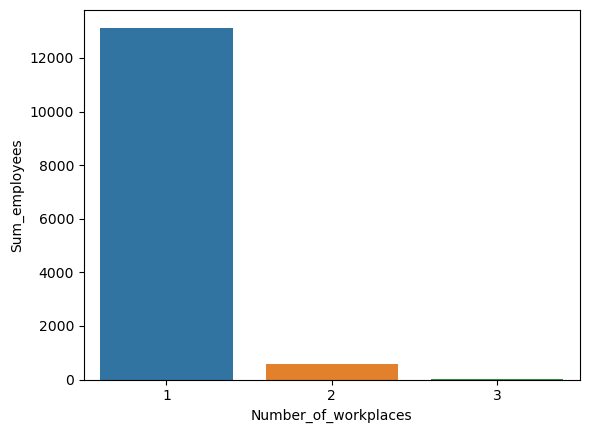

In [17]:
sns.barplot(data=df_for_plot, x='Number_of_workplaces', y='Sum_employees')
# this does not look right

Najväčší sumárny úväzok?

In [18]:
df_wp_grouped['Employment_Ratio_sum'].max()

200.0

Skúsime vytvoriť maticu (univerzita x univerzita) pre počty pracovníkov pre jednotlivé kombinácie univerzít:

In [19]:
# set(df_workplaces['Employment_Workplace_University'])

In [20]:
df_for_matrix = pd.DataFrame()

In [21]:
keys_of_multiworking_employees = list(df_wp_grouped[df_wp_grouped['Number_of_workplaces'] > 1]['Employee_ID'])

Potrebujeme stĺpce pocet, uni1, uni2

In [22]:
lst = []
for key in keys_of_multiworking_employees:
    this_employee = df_workplaces[df_workplaces["Employee_ID"] == key]['Employment_Workplace_University']
    for row1, row2 in itertools.combinations(this_employee, 2):
        lst.append([1, row1, row2])

In [23]:
combinations = pd.DataFrame(lst, columns=['pocet', 'uni1', 'uni2'])
display(combinations)

,pocet,uni1,uni2
0,1,Univerzita Komenského v Bratislave,Slovenská zdravotnícka univerzita v Bratislave
1,1,Univerzita Pavla Jozefa Šafárika v Košiciach,Technická univerzita v Košiciach
2,1,Univerzita sv. Cyrila a Metoda v Trnave,Slovenská technická univerzita v Bratislave
3,1,Univerzita Komenského v Bratislave,Vysoká škola výtvarných umení v Bratislave
4,1,Žilinská univerzita v Žiline,Žilinská univerzita v Žiline
...,...,...,...
631,1,Trenčianska univerzita Alexandra Dubčeka v Tre...,Trenčianska univerzita Alexandra Dubčeka v Tre...
632,1,Žilinská univerzita v Žiline,Žilinská univerzita v Žiline
633,1,Prešovská univerzita v Prešove,Vysoká škola múzických umení v Bratislave
634,1,Žilinská univerzita v Žiline,Žilinská univerzita v Žiline


In [24]:
combinations = combinations.groupby(['uni1', 'uni2']).sum().reset_index().sort_values(by='uni1')

In [25]:
combinations

,uni1,uni2,pocet
0,Akadémia Policajného zboru,Trnavská univerzita v Trnave,1
1,Akadémia umení v Banskej Bystrici,Hudobná a umelecká akadémia Jána Albrechta - B...,2
2,Akadémia umení v Banskej Bystrici,Slovenská zdravotnícka univerzita v Bratislave,1
3,Akadémia umení v Banskej Bystrici,Vysoká škola múzických umení v Bratislave,2
14,Ekonomická univerzita v Bratislave,Žilinská univerzita v Žiline,1
...,...,...,...
148,Vysoká škola zdravotníctva a sociálnej práce s...,Univerzita Pavla Jozefa Šafárika v Košiciach,4
151,Žilinská univerzita v Žiline,Trenčianska univerzita Alexandra Dubčeka v Tre...,7
152,Žilinská univerzita v Žiline,Univerzita Komenského v Bratislave,1
150,Žilinská univerzita v Žiline,Technická univerzita v Košiciach,1


In [26]:
matrix = combinations.pivot(index='uni1', columns='uni2', values='pocet')
matrix = matrix.fillna(0)
display(matrix)

uni2,Akadémia Policajného zboru,Akadémia umení v Banskej Bystrici,Bratislavská medzinárodná škola liberálnych štúdií,Ekonomická univerzita v Bratislave,"Hudobná a umelecká akadémia Jána Albrechta - Banská Štiavnica, s. r. o., odborná vysoká škola",Katolícka univerzita v Ružomberku,Paneurópska vysoká škola,Prešovská univerzita v Prešove,Slovenská poľnohospodárska univerzita v Nitre,Slovenská technická univerzita v Bratislave,...,Univerzita sv. Cyrila a Metoda v Trnave,Univerzita veterinárskeho lekárstva a farmácie v Košiciach,Vysoká škola Danubius,Vysoká škola manažmentu,Vysoká škola medzinárodného podnikania ISM Slovakia v Prešove,"Vysoká škola medzinárodných a veřejných vztahů Praha, o. p. s.",Vysoká škola múzických umení v Bratislave,Vysoká škola výtvarných umení v Bratislave,"Vysoká škola zdravotníctva a sociálnej práce sv. Alžbety v Bratislave, n. o.",Žilinská univerzita v Žiline
uni1,,,,,,,,,,,,,,,,,,,,,
Akadémia Policajného zboru,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Akadémia umení v Banskej Bystrici,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0
Ekonomická univerzita v Bratislave,0.0,0.0,0.0,5.0,0.0,0.0,0.0,1.0,0.0,3.0,...,0.0,0.0,0.0,0.0,0.0,2.0,1.0,0.0,0.0,1.0
"Hudobná a umelecká akadémia Jána Albrechta - Banská Štiavnica, s. r. o., odborná vysoká škola",0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Katolícka univerzita v Ružomberku,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
Paneurópska vysoká škola,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0
Prešovská univerzita v Prešove,0.0,0.0,0.0,1.0,0.0,1.0,0.0,2.0,0.0,0.0,...,0.0,0.0,0.0,0.0,4.0,0.0,1.0,0.0,2.0,0.0
Slovenská poľnohospodárska univerzita v Nitre,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
Slovenská technická univerzita v Bratislave,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,39.0,...,2.0,0.0,0.0,1.0,0.0,0.0,1.0,3.0,0.0,3.0


In [27]:
# toto nefungovalo: chceli sme vybrat iba verejne univerzity

# verejne_list = ['Prešovská univerzita v Prešove', 'Slovenská poľnohospodárska univerzita v Nitre', 
#                'Slovenská technická univerzita v Bratislave', 'Slovenská zdravotnícka univerzita v Bratislave',
#                'Trenčianska univerzita Alexandra Dubčeka v Trenčíne', 'Trnavská univerzita v Trnave', 'Univerzita Komenského', 
#                'Univerzita Pavla Jozefa Šafárika v Košiciach', 'Univerzita sv. Cyrila a Metoda v Trnave',
#                 'Katolícka univerzita v Ružomberku', 'Akadémia umení v Banskej Bystrici',
#                 'Vysoká škola výtvarných umení v Bratislave', 'Vysoká škola múzických umení v Bratislave',
#                 'Technická univerzita vo Zvolene', 'Ekonomická univerzita v Bratislave',
#                 'Žilinská univerzita v Žiline', 'Technická univerzita v Košiciach',
#                 'Univerzita Mateja Bela v Banskej Bystrici', 'Univerzita Konštantína Filozofa v Nitre',
#                 'Univerzita veterinárskeho lekárstva a farmácie v Košiciach', 'Univerzita sv. Cyrila a Metoda v Trnave',
#                 'Univerzita J. Selyeho']
# pd.Index(verejne_list)

# university_abbreviations = {'UNIVERZITA KOMENSKÉHO': 'UK', 
#                             'UNIVERZITA P.J.ŠAFÁRIKA': 'UPJŠ', 
#                             'KATOLÍCKA UNIVERZITA': 'KU', 
#                             'AKADÉMIA UMENÍ': 'AU', 
#                             'VŠ VÝTVARNÝCH UMENÍ': 'VŠVU', 
#                             'VŠ MÚZICKÝCH UMENÍ': 'VŠMU', 
#                             'TECH. UNIVERZITA ZVOLEN': 'TUZVO', 
#                             'SLOV. POĽNOHOSP. UNIV.': 'SPU', 
#                             'EKONOMICKÁ UNIVERZITA': 'EU', 
#                             'TRENČ. UNIV. A.DUBČEKA': 'TUAD', 
#                             'TRENČIANSKA UNIVERZITA': 'TUAD',
#                             'ŽILINSKÁ UNIVERZITA': 'ŽU', 
#                             'TECH. UNIVERZITA KOŠICE': 'TUKE', 
#                             'SLOV.TECHN. UNIVERZITA': 'STU', 
#                             'TRNAVSKÁ UNIVERZITA': 'TVU', 
#                             'UNIVERZITA MATEJA BELA': 'UMB', 
#                             'UNIVER. KONŠT. FILOZOFA': 'UKF', 
#                             'UNIVERZITA VETERIN.LEK.': 'UVL', 
#                             'UNIV.sv.CYRILA a METODA': 'UCM', 
#                             'PREŠOVSKÁ UNIVERZITA': 'PU', 
#                             'UNIVERZITA J.SELYEHO': 'UJS'}

# matrix_verejne = matrix.loc[verejne_list, verejne_list]

Treba este symetriu:

In [28]:
matrix = np.maximum(matrix, matrix.T)
display(matrix)

/tmp/ipykernel_45088/2192946420.py:1: FutureWarning: Calling a ufunc on non-aligned DataFrames (or DataFrame/Series combination). Currently, the indices are ignored and the result takes the index/columns of the first DataFrame. In the future , the DataFrames/Series will be aligned before applying the ufunc.
Convert one of the arguments to a NumPy array (eg 'ufunc(df1, np.asarray(df2)') to keep the current behaviour, or align manually (eg 'df1, df2 = df1.align(df2)') before passing to the ufunc to obtain the future behaviour and silence this warning.
  matrix = np.maximum(matrix, matrix.T)


uni2,Akadémia Policajného zboru,Akadémia umení v Banskej Bystrici,Bratislavská medzinárodná škola liberálnych štúdií,Ekonomická univerzita v Bratislave,"Hudobná a umelecká akadémia Jána Albrechta - Banská Štiavnica, s. r. o., odborná vysoká škola",Katolícka univerzita v Ružomberku,Paneurópska vysoká škola,Prešovská univerzita v Prešove,Slovenská poľnohospodárska univerzita v Nitre,Slovenská technická univerzita v Bratislave,...,Univerzita sv. Cyrila a Metoda v Trnave,Univerzita veterinárskeho lekárstva a farmácie v Košiciach,Vysoká škola Danubius,Vysoká škola manažmentu,Vysoká škola medzinárodného podnikania ISM Slovakia v Prešove,"Vysoká škola medzinárodných a veřejných vztahů Praha, o. p. s.",Vysoká škola múzických umení v Bratislave,Vysoká škola výtvarných umení v Bratislave,"Vysoká škola zdravotníctva a sociálnej práce sv. Alžbety v Bratislave, n. o.",Žilinská univerzita v Žiline
uni1,,,,,,,,,,,,,,,,,,,,,
Akadémia Policajného zboru,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Akadémia umení v Banskej Bystrici,0.0,0.0,0.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0
Ekonomická univerzita v Bratislave,0.0,0.0,0.0,5.0,0.0,0.0,0.0,1.0,0.0,3.0,...,0.0,0.0,0.0,0.0,0.0,2.0,1.0,0.0,0.0,1.0
"Hudobná a umelecká akadémia Jána Albrechta - Banská Štiavnica, s. r. o., odborná vysoká škola",0.0,1.0,5.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
Katolícka univerzita v Ružomberku,0.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
Paneurópska vysoká škola,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,1.0,0.0,0.0,0.0
Prešovská univerzita v Prešove,0.0,0.0,0.0,1.0,0.0,1.0,0.0,2.0,2.0,0.0,...,0.0,0.0,0.0,0.0,4.0,0.0,1.0,0.0,2.0,0.0
Slovenská poľnohospodárska univerzita v Nitre,0.0,0.0,1.0,0.0,1.0,0.0,2.0,0.0,2.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,2.0
Slovenská technická univerzita v Bratislave,0.0,0.0,0.0,0.0,0.0,0.0,2.0,2.0,0.0,39.0,...,2.0,0.0,0.0,1.0,0.0,0.0,1.0,3.0,0.0,3.0


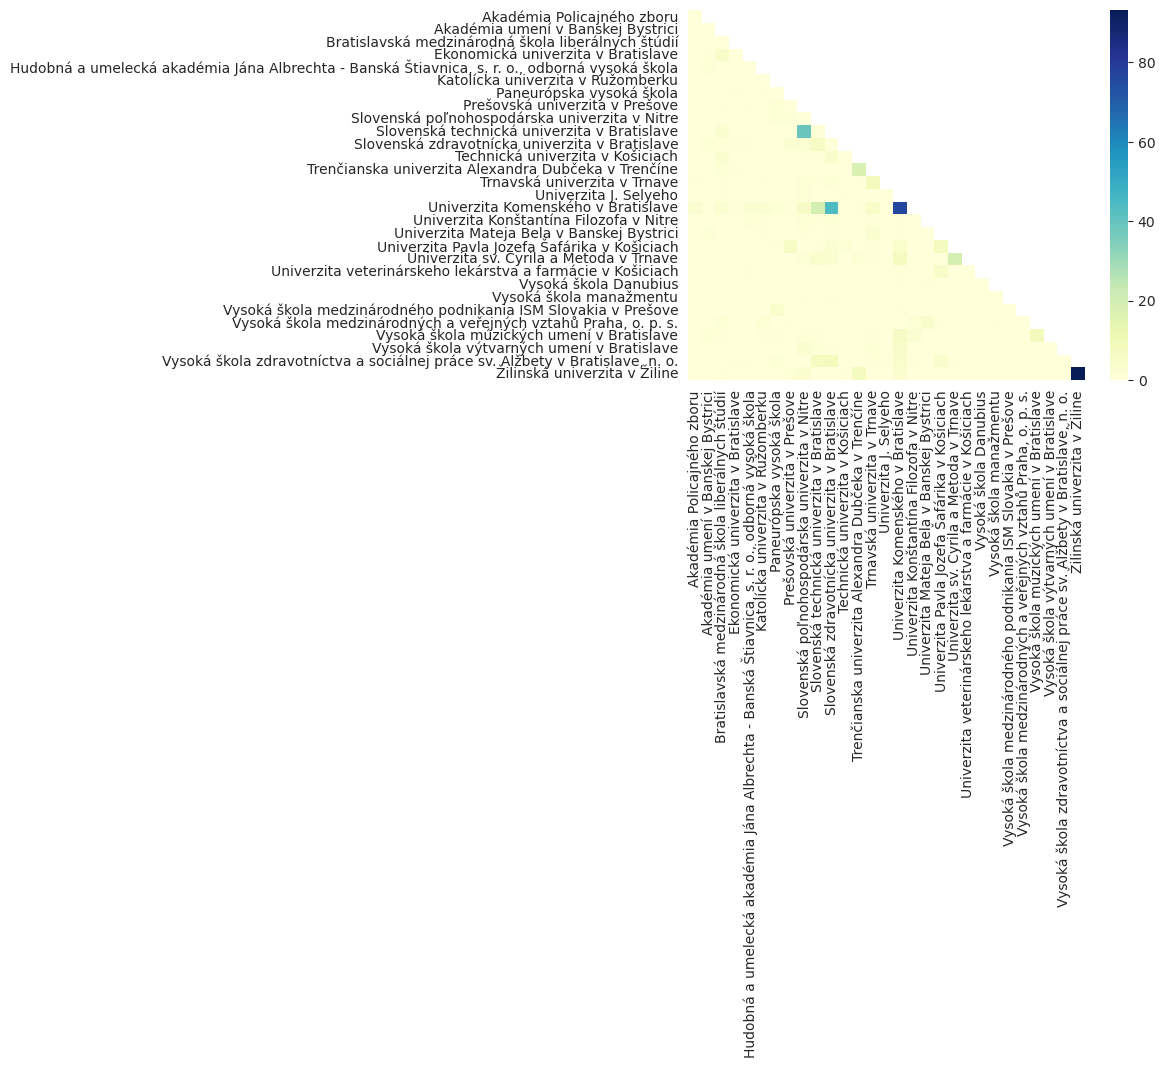

In [29]:
x_ticks = list(matrix.columns)

mask = np.zeros_like(matrix)
mask[np.triu_indices_from(mask, k=1)] = True

with sns.axes_style("white"):
    ax = sns.heatmap(matrix.values, cmap="YlGnBu", mask=mask, xticklabels=x_ticks, yticklabels=x_ticks)
    # ax.set_xticklabels(x_ticks)
    plt.show()

    

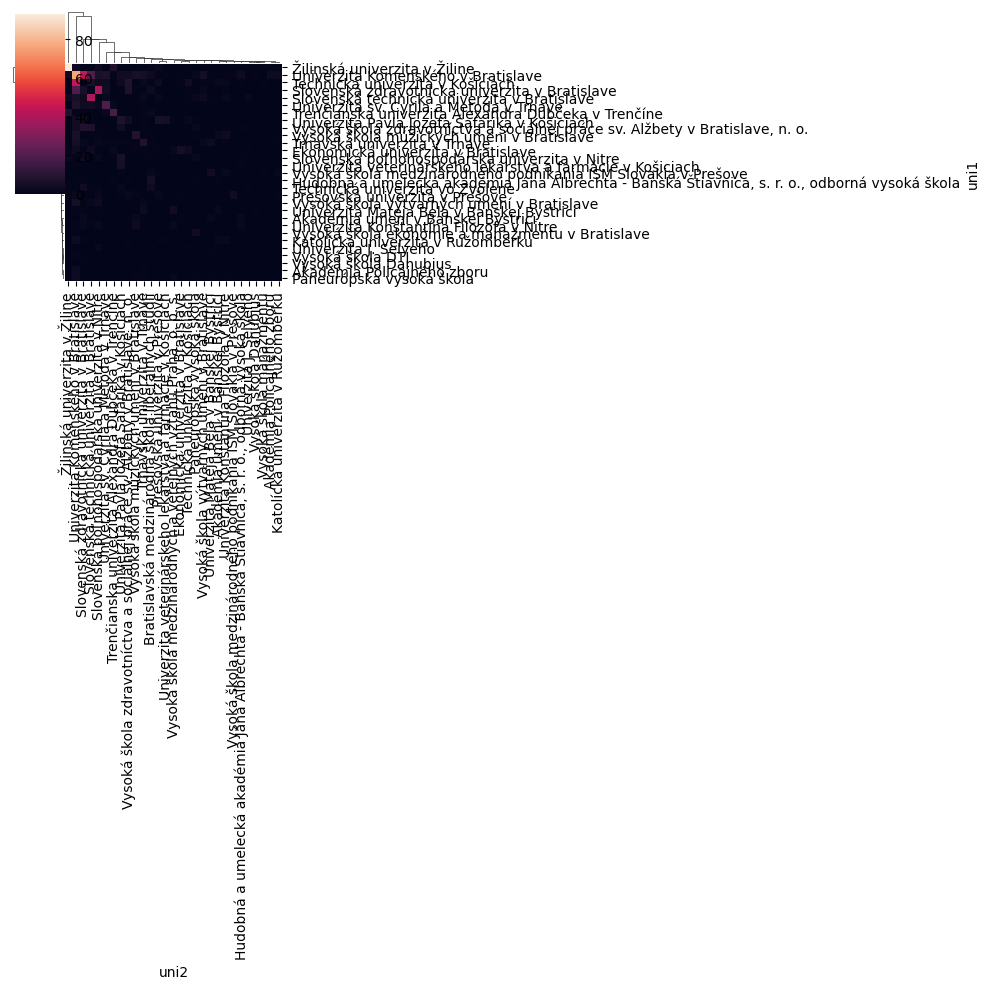

In [30]:
sns.clustermap(matrix)

#### Univerzity s najviac spoločnými zamestnancami

Vyberieme iba tie riadky a stlpce, ktore maju aspon 5 spolocnych zamestnancov s nejakou inou uni:

In [31]:
matrix = matrix.loc[(matrix > 5).any(axis=1), (matrix > 5).any(axis=0)]

display(matrix)

uni2,Prešovská univerzita v Prešove,Slovenská poľnohospodárska univerzita v Nitre,Slovenská technická univerzita v Bratislave,Slovenská zdravotnícka univerzita v Bratislave,Trenčianska univerzita Alexandra Dubčeka v Trenčíne,Trnavská univerzita v Trnave,Univerzita Komenského v Bratislave,Univerzita Pavla Jozefa Šafárika v Košiciach,Univerzita sv. Cyrila a Metoda v Trnave,Vysoká škola múzických umení v Bratislave,"Vysoká škola zdravotníctva a sociálnej práce sv. Alžbety v Bratislave, n. o.",Žilinská univerzita v Žiline
uni1,,,,,,,,,,,,
Slovenská poľnohospodárska univerzita v Nitre,0.0,2.0,0.0,3.0,0.0,0.0,1.0,6.0,0.0,0.0,0.0,2.0
Slovenská technická univerzita v Bratislave,2.0,0.0,39.0,3.0,0.0,2.0,6.0,0.0,2.0,1.0,0.0,3.0
Slovenská zdravotnícka univerzita v Bratislave,0.0,39.0,1.0,6.0,0.0,1.0,19.0,1.0,4.0,1.0,7.0,0.0
Technická univerzita v Košiciach,3.0,3.0,6.0,0.0,0.0,2.0,44.0,3.0,3.0,0.0,8.0,0.0
Trenčianska univerzita Alexandra Dubčeka v Trenčíne,0.0,0.0,0.0,0.0,18.0,1.0,1.0,0.0,2.0,0.0,0.0,7.0
Trnavská univerzita v Trnave,0.0,2.0,1.0,2.0,1.0,8.0,5.0,1.0,1.0,1.0,1.0,0.0
Univerzita Komenského v Bratislave,1.0,6.0,19.0,44.0,1.0,5.0,76.0,4.0,7.0,6.0,4.0,3.0
Univerzita Pavla Jozefa Šafárika v Košiciach,6.0,0.0,1.0,3.0,0.0,1.0,4.0,7.0,0.0,0.0,4.0,0.0
Univerzita sv. Cyrila a Metoda v Trnave,0.0,2.0,4.0,3.0,2.0,1.0,7.0,0.0,19.0,0.0,1.0,0.0


In [32]:
# spravme skratky:
print(list(matrix.columns))
x_ticks = ['PU', 'SPU', 'STU', 'SZU', 'TUAD', 'TRU', 'UK', 'UPJŠ', 'UCM', 'VŠMU', 'VŠZaSP', 'ŽU']

['Prešovská univerzita v Prešove', 'Slovenská poľnohospodárska univerzita v Nitre', 'Slovenská technická univerzita v Bratislave', 'Slovenská zdravotnícka univerzita v Bratislave', 'Trenčianska univerzita Alexandra Dubčeka v Trenčíne', 'Trnavská univerzita v Trnave', 'Univerzita Komenského v Bratislave', 'Univerzita Pavla Jozefa Šafárika v Košiciach', 'Univerzita sv. Cyrila a Metoda v Trnave', 'Vysoká škola múzických umení v Bratislave', 'Vysoká škola zdravotníctva a sociálnej práce sv. Alžbety v Bratislave, n. o.', 'Žilinská univerzita v Žiline']


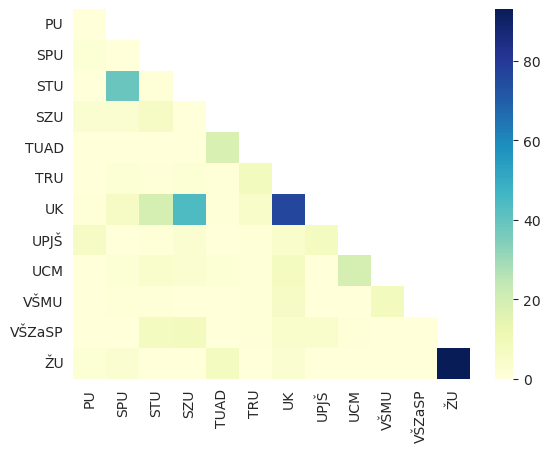

<Figure size 640x480 with 0 Axes>

In [36]:
mask = np.zeros_like(matrix)
mask[np.triu_indices_from(mask, k=1)] = True

with sns.axes_style("white"):
    ax = sns.heatmap(matrix.values, cmap="YlGnBu", mask=mask, xticklabels=x_ticks, yticklabels=x_ticks)
    # ax.set_xticklabels(x_ticks)
    plt.show()

Skusime este Cluster map:

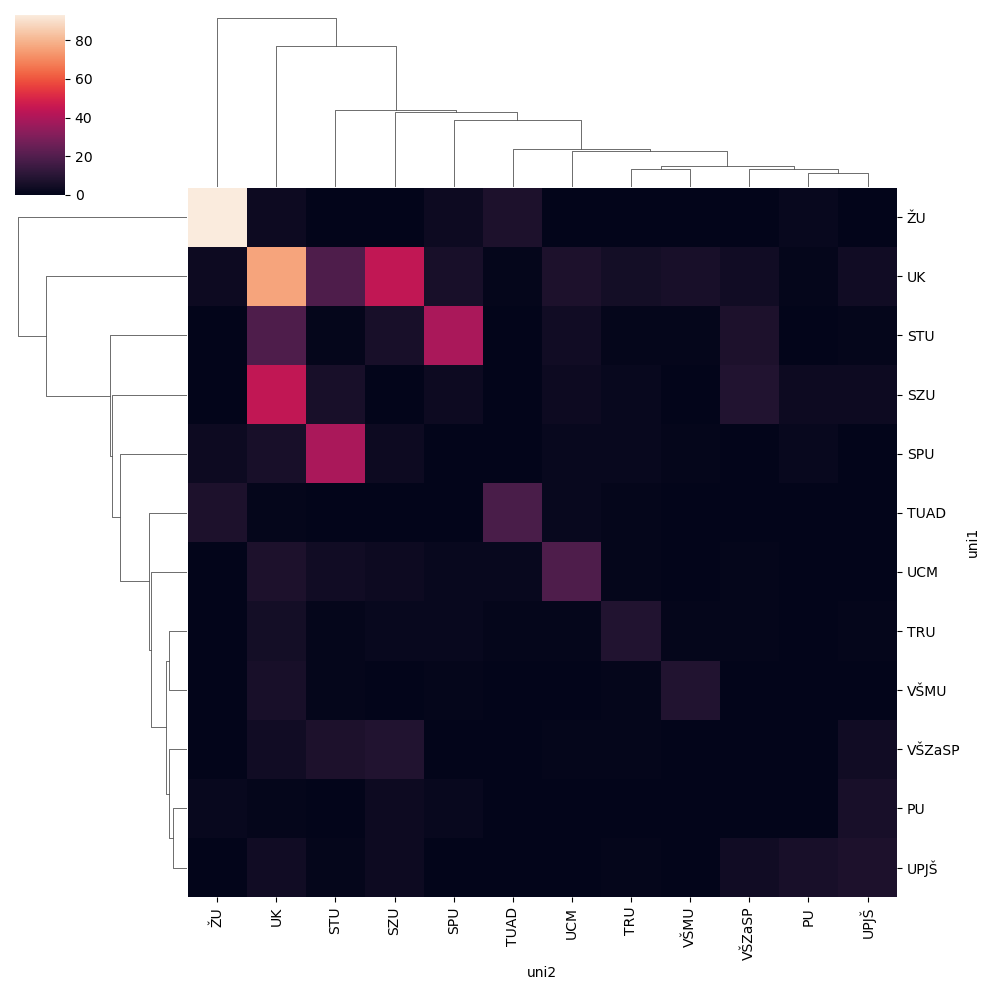

In [34]:
sns.clustermap(matrix, xticklabels=x_ticks, yticklabels=x_ticks)